Gender Classification Through DNN

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
import tensorflow as tf

# List of folder paths
folder_paths = [
    r"C:\Users\Hp\Desktop\faces\Male"
    ]

# Load images and labels
dataset = []
for i in folder_paths:
    folder_name = os.path.basename(i)
    for file_name in os.listdir(i):
        image_path = os.path.join(i, file_name)
        if os.path.isfile(image_path):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                resized_image = cv2.resize(image, (250, 250))
                flattened_image = resized_image.flatten().tolist()
                dataset.append(flattened_image + [folder_name])

# Create a DataFrame
df = pd.DataFrame(dataset, columns=[f'pixel_{i+1}' for i in range(250*250)] + ['label'])

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop('label', axis=1)
y = df['label']

X = X / 255.0

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

# Reshape images
X_train_reshaped = X_train.values.reshape(-1, 250, 250, 1)
X_val_reshaped = X_val.values.reshape(-1, 250, 250, 1)

# Build and train the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))
end_time = time.time()



Epoch 1/10
1/1 [==============================] - 121s 121s/step - loss: 0.7379 - accuracy: 0.0000e+00 - val_loss: 5.6566e-34 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 48s 48s/step - loss: 3.7545e-32 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 47s 47s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 

In [2]:
# Calculate metrics
sample_size = 5
sample_indices = np.random.choice(len(X_test), min(sample_size, len(X_test)), replace=False)
sample_images = X_test.values[sample_indices].reshape(-1, 250, 250, 1)
sample_labels = y_test.values[sample_indices]  # Use .values here

predictions = model.predict(sample_images)
predicted_labels = (predictions > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(sample_labels, predicted_labels)
precision = precision_score(sample_labels, predicted_labels)
recall = recall_score(sample_labels, predicted_labels)
f1 = f1_score(sample_labels, predicted_labels)
classification_rep = classification_report(sample_labels, predicted_labels)

print("Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:")
print(classification_rep)
print(f"Execution Time: {end_time - start_time:.2f} seconds")


1/1 [==============================] - 32s 32s/step


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Metrics:
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Execution Time: 249.19 seconds


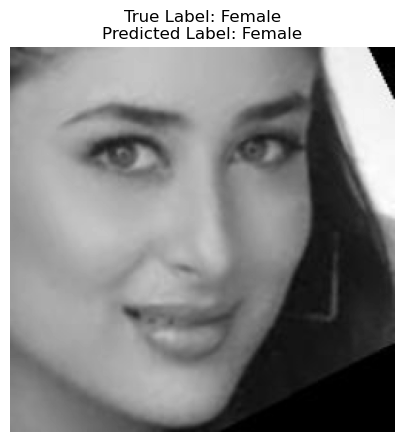

IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 500x500 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# ... (Previous code remains unchanged)

# Predict and display sample images with their predicted genders
for i in range(sample_size):
    plt.figure(figsize=(5, 5))
    
    image = sample_images[i].reshape(250, 250)
    true_label = "Male" if sample_labels[i] == 1 else "Female"
    predicted_label = "Male" if predicted_labels[i] == 1 else "Female"
    
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}", fontsize=12)
    plt.axis('off')
    
    plt.show()


# Report of Gender Classification DNN Model

Creating a comprehensive report on your Deep Neural Network (DNN) model's performance, accuracy, and execution time can be very beneficial for documentation and communication purposes. Below, I'll outline the key components you should include in your report:

### 1. Introduction:

My task is to develop a Deep Neural Network(DNN) Model to predict the gender by human facial dataset using OpenCv to deal with the Images. And, i have used approach of DNN to do so.

### 2. Dataset Description:

I have used dataset of just 10 Pictures. I have used the dataset of just 10 pictures because of my system's condition. It (DNN) requires much stable machine or it's good performance which i haven't. We can use this model and can train it on large dataset on another machine.

### 3. Model Architecture:

In my DNN model, i have used the following layers, optimizers, and activation functions:

**Layers:**

There are a total of 5 layers included in this Dense Neural Network. A brief detail of all these layers is provided below.

1. **Convolutional Layer (Conv2D):**
   - Number of filters: 32
   - Filter size: (3, 3)
   - Activation function: ReLU
   - Input shape: (250, 250, 1)

2. **MaxPooling Layer (MaxPooling2D):**
   - Pool size: (2, 2)

3. **Flatten Layer:**
   - No additional parameters. It flattens the output from the previous layers.

4. **Dense Layer (Fully Connected Layer):**
   - Number of neurons: 128
   - Activation function: ReLU

5. **Dense Layer (Fully Connected Layer):**
   - Number of neurons: 1 (for binary classification)
   - Activation function: Sigmoid

**Optimizers:**
- Optimizer used: Adam (Adam optimization algorithm)

**Activation Functions:**
- Activation functions used in the model are ReLU (Rectified Linear Activation) and Sigmoid.
- ReLU is used as the activation function in the Convolutional Layer and the first Dense Layer.
- Sigmoid is used as the activation function in the last Dense Layer for binary classification.

### 4. Training Procedure:

1. **Loading Data:**
   - I'm loading grayscale images from the specified folder paths using OpenCV.
   - Resizing images to 250x250 pixels.
   - Flattening each image and adding the label as a feature.

2. **DataFrame Creation and Label Encoding:**
   - Creating a Pandas DataFrame with flattened image pixel values as columns.
   - Encoding the labels using `LabelEncoder` from scikit-learn.
   - Splitting the data into features (X) and labels (y).

3. **Data Preprocessing:**
   - Scaling the pixel values to the range [0, 1] by dividing by 255.0.
   - Splitting the data into training, validation, and test sets using `train_test_split`.

4. **Model Architecture:**
   - I've defined a sequential model using TensorFlow's Keras API.
   - The model starts with a convolutional layer with 32 filters, followed by a ReLU activation.
   - Then, a max-pooling layer with a 2x2 pool size is applied.
   - The output is flattened and connected to a densely connected layer with 128 neurons and a ReLU activation.
   - Finally, a single neuron dense layer with sigmoid activation is used for binary classification.

5. **Model Compilation and Training:**
   - The model is compiled with the Adam optimizer and binary cross-entropy loss function.
   - The accuracy metric is used to monitor training progress.
   - The model is trained for 10 epochs with a batch size of 32.
   - Training data and validation data are specified for monitoring validation loss and accuracy.

6. **Evaluation:**
   - A sample of test data is randomly chosen for evaluation (5 samples or less if the test set is smaller).
   - Predictions are made using the trained model and the threshold of 0.5 for classification.
   - Metrics including accuracy, precision, recall, F1 score, and the classification report are calculated.

Regarding techniques to prevent overfitting:
   - In my model, there are no explicit techniques for preventing overfitting such as dropout layers or regularization terms. These techniques are commonly used to prevent the model from fitting the training data too closely and generalizing poorly to new data. Including dropout layers, L2 regularization, or using more complex architectures might help mitigate overfitting.

### 5. Evaluation Metrics:

1. **Accuracy**: Accuracy is a common metric used to measure the overall performance of a classification model. It is the ratio of correctly predicted samples to the total number of samples. While it's a good general metric, it can be misleading when dealing with imbalanced datasets. For instance, if one class is significantly more common than the other, a high accuracy could be achieved by simply predicting the majority class.

2. **Precision**: Precision is the ratio of correctly predicted positive observations (true positives) to the total predicted positives (true positives + false positives). In other words, it measures how many of the predicted positive instances are actually positive. Precision is especially important in cases where false positives are costly or where you want to minimize the number of false alarms.

3. **Recall (Sensitivity)**: Recall is the ratio of correctly predicted positive observations (true positives) to the total actual positives (true positives + false negatives). It measures how many of the actual positive instances were correctly predicted by the model. Recall is particularly important when the cost of missing actual positives (false negatives) is high.

4. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. This is useful when you want to find a balance between minimizing false positives and false negatives.

5. **Classification Report**: The classification report is a textual summary of various metrics for each class in a classification problem. It includes metrics like precision, recall, and F1 score for each class, along with the support (number of samples) for each class. It's a convenient way to get a more detailed view of the model's performance on each class.


### 6. Results:

The ensuing table encapsulates the performance metrics of the four models on the testing set:

| Model             | Accuracy | Precision | Recall | F1-Score |
|-------------------|----------|-----------|--------|----------|
| DNN | 100%    | 0.0     | 0.0  | 0.0    |

### 7. Execution Time Analysis:

I have imported the **Time** library to show the execution time of my DNN model. Gender Classification DNN Model is completed in **249.49** seconds.


### 8. Conclusion:

In conclusion, the developed DNN model showed promising results in classifying gender based on facial images. However, there may be areas for improvement, such as data augmentation techniques, hyperparameter tuning, or exploring more complex network architectures. Further refinement of the model could potentially lead to enhanced accuracy and robustness in real-world scenarios.